### Student Information
Name: Tara Thomas

Student ID: 109065426

GitHub ID: tara-thomas

Kaggle name: Tara Thomas

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

import pandas as pd

### loading the training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

#combining the emotion data
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### loading the testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

#combining the emotion data
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

# shuffling the dataframe
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

<h3>Exercise 1</h3>
<p>Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)</p>

<AxesSubplot:xlabel='Words', ylabel='Frequency'>

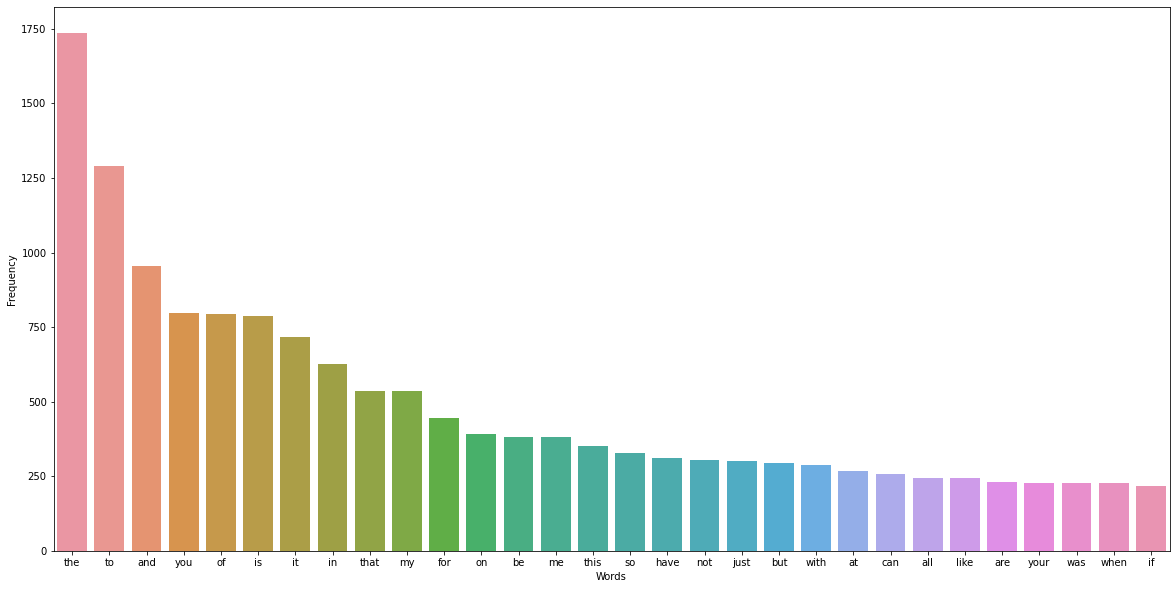

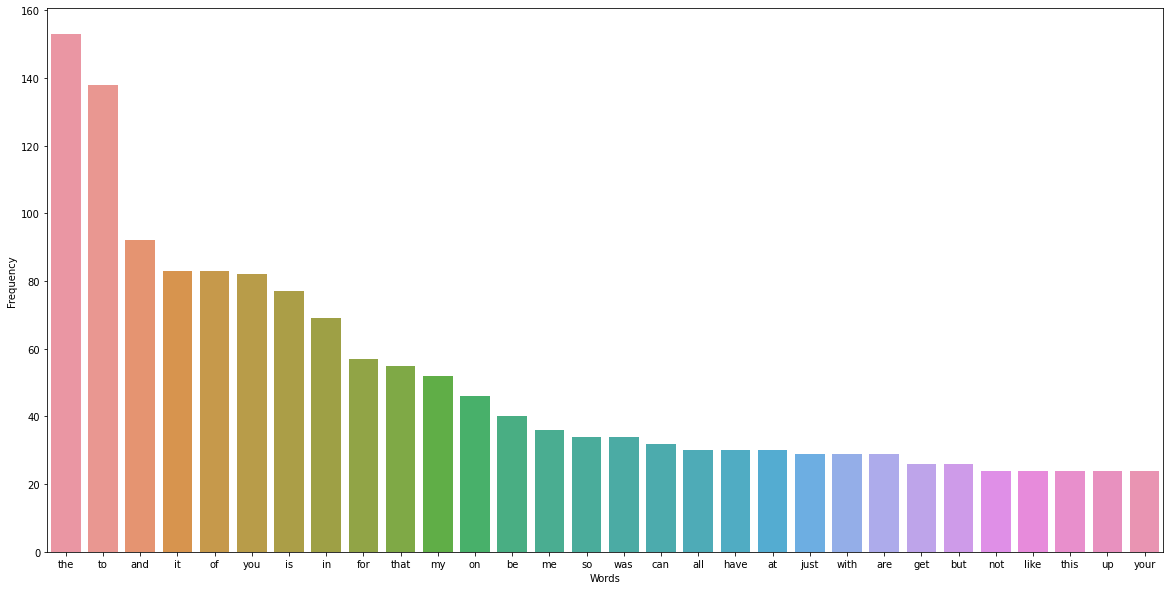

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns

#### graph for the training dataset ######

cv = CountVectorizer(max_features=30) 
train_count = cv.fit_transform(train_df.text) #gets the top 30 most frequent words and their frequencies

#creates a sorted dataframe with the 30 words and their frequency 
df = pd.DataFrame({"Words":cv.get_feature_names() ,
                  "Frequency":train_count.toarray().sum(axis=0)}) # sums up the frequency of each word in each document
df = df.sort_values(by=['Frequency'],ascending=False) # sorts the dataframe in descending order by frequency

#plots the graph
plt.figure(figsize=(20,10))
sns.barplot(x='Words', 
            y="Frequency", 
            data=df)

#### graph for the testing dataset ######

test_count = cv.fit_transform(test_df.text)

#creates a sorted dataframe with the 30 words and their frequency 
df = pd.DataFrame({"Words":cv.get_feature_names(),
                  "Frequency":test_count.toarray().sum(axis=0)})
df = df.sort_values(by=['Frequency'],ascending=False)

#plots the graph
plt.figure(figsize=(20,10))
sns.barplot(x='Words', 
            y="Frequency", 
            data=df)

<h3>Exercise 2</h3>
<p>Generate an embedding using the TF-IDF vectorizer instead of the BOW one with 1000 features and show the feature names for features [100:110].</p>

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

#create the tfidf vectorizer and limit it to 1000 features
tf_idf_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) #use nltk to tokenize the sentences
tf_idf_vectorizer.fit(train_df.text)
train_tf_count = tf_idf_vectorizer.transform(train_df.text) #get weights for the features
print("Shape:\n",train_tf_count.shape,"\n\nFeature names:\n", tf_idf_vectorizer.get_feature_names()[100:110]) #output the features between 99 and 110

c:\users\tarathomas\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Shape:
 (3613, 1000) 

Feature names:
 ['awareness', 'away', 'awe', 'awesome', 'awful', 'b', 'baby', 'back', 'bad', 'ball']


<h3>Exercise 3</h3>
<p>Can you interpret the results above? What do they mean?</p>

<p>The results display a confusion matrix:<br>
 [59 12 10  3]<br>
 [15 72 10 13]<br>
 [ 6 13 51  9]<br>
 [ 8 10  8 48]</p>
    
<p><b>Answer: </b>This matrix shows how the model made false predictions for every single emotion category. Since there are no zeros in the matrix, it means the model has mistaken each emotion for every other emotion at least 3 times. Although fear had the highest true positive number (72) we can't say the model is better at predicting the fear emotion since the dataset was a little imbalanced towards fear. Actually, we can see that the model has more problems distinguishing the fear emotion from others because every emotion was falsely predicted as being fear the most compared to others, anger especially. We can also see that every single emotion was accurately predicted more than it was mispredicted. For example, the sad emotion was accurately predicted 48 times and falsely predicted as other emotions 25 times. So, the model is doing a decent job at predicting emotions from the text. </p>

<h3>Exercise 4</h3>
<p>Build a model using a Naive Bayes model and train it. What are the testing results?</p>

Training set:  0.880708552449488
Testing set:  0.7723342939481268 

              precision    recall  f1-score   support

       anger       0.74      0.75      0.75        84
        fear       0.79      0.80      0.79       110
         joy       0.85      0.78      0.82        79
     sadness       0.71      0.74      0.73        74

    accuracy                           0.77       347
   macro avg       0.77      0.77      0.77       347
weighted avg       0.77      0.77      0.77       347



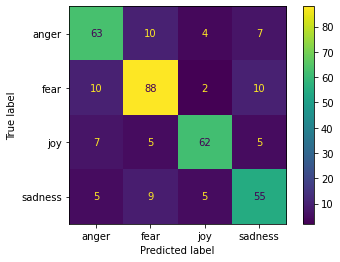

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

#utilize the count vectorizer for train and test data
vec = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 
vec.fit(train_df.text)
train_x = vec.transform(train_df.text)
train_y = train_df.emotion

test_x = vec.transform(test_df.text)
test_y = test_df.emotion

#create the model
nb_model = MultinomialNB()
nb_model.fit(train_x, train_y) #train the model

#test the model
train_predict = nb_model.predict(train_x) 
test_predict = nb_model.predict(test_x)

#evaluate the model by outputting the accuracy and classification results 
print("Training set: ", accuracy_score(train_y, train_predict))
print("Testing set: ", accuracy_score(test_y, test_predict),'\n') #testing results
print(classification_report(test_y, test_predict)) #testing results

cm = confusion_matrix(y_true=test_y, y_pred=test_predict)
cm_display = ConfusionMatrixDisplay(cm,display_labels=['anger', 'fear', 'joy', 'sadness']).plot() #display confusion matrix

<h3> Exercise 5 </h3>
<p>How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.</p>

<p><b>Answer: </b>From the results we can see that the Naive Bayes (NB) model performed better than the Decision tree (DT) model. Just by looking at the accuracy, the training accuracy for the NB model was 0.88 and testing accuracy was 0.77; the training accuracy for the DT model was 0.99 and the testing accuracy was 0.66. We can see that it seems like the NB model was able to generalize better than the DT model allowing it to have a higher accuracy for test even with a lower train accuracy compared to the DT model. So, maybe the DT model was overfitted making it perform so poorly on the test data compared to the train data. We can also see the differences in the confusion matrix for both of the models. The NB model performed better at predicting each emotion compared to the DT model. Another possible reason for NB performing better than DT is because 500 more features were used to train the NB model.</p>

<h3>Exercise 6</h3>
<p>Plot the Training and Validation Accuracy and Loss (different plots). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?</p>
<p>**Utilized code from lab to create the model**<p>

In [5]:
import keras
from sklearn.preprocessing import LabelEncoder

#transform features for the training and test dataset using count vectorizer
vec = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 
vec.fit(train_df['text'])

train_x = vec.fit_transform(train_df['text'])
train_y = train_df['emotion']

test_x = vec.fit_transform(test_df['text'])
test_y = test_df['emotion']

#since emotion is categorical we can transform it to one hot encoding
label_encoder = LabelEncoder()
label_encoder.fit(train_y)

train_y = label_encoder.transform(train_y)
train_y = keras.utils.to_categorical(train_y)

test_y = label_encoder.transform(test_y)
test_y = keras.utils.to_categorical(test_y)

from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input and output shapes for the model
input_shape = train_x.shape[1]
output_shape = len(label_encoder.classes_)

# input layer
model_input = Input(shape=(input_shape, ))  # 1000
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

c:\users\tarathomas\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
dense (Dense)                (None, 64)                64064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                

In [6]:
from keras.callbacks import CSVLogger
import tensorflow as tf

#training info output file
csv_logger = CSVLogger('logs/training_log.csv')

# training settings
epochs = 25
batch_size = 32
print(type(train_x))

#reorder the indices or fitting the data into the model will result in an index out of order error
train_x.sort_indices()
test_x.sort_indices()

# training
history = model.fit(train_x,train_y, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (test_x, test_y))

<class 'scipy.sparse.csr.csr_matrix'>
Epoch 1/25
113/113 [==============================] - 0s 4ms/step - loss: 1.2985 - accuracy: 0.4240 - val_loss: 1.4025 - val_accuracy: 0.3343
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 0.7842 - accuracy: 0.7498 - val_loss: 1.9258 - val_accuracy: 0.2709
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8879 - val_loss: 2.5318 - val_accuracy: 0.2939
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.9344 - val_loss: 2.9711 - val_accuracy: 0.3084
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9502 - val_loss: 3.3617 - val_accuracy: 0.2767
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.1223 - accuracy: 0.9646 - val_loss: 3.7242 - val_accuracy: 0.2795
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.1028 - accuracy: 0.9687 - val_loss

In [7]:
#view the log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log #ensure data was read from the log file

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.424024,1.298467,0.334294,1.402450
1,1,0.749792,0.784173,0.270893,1.925836
2,2,0.887905,0.348976,0.293948,2.531802
3,3,0.934404,0.214417,0.308357,2.971138
4,4,0.950180,0.156220,0.276657,3.361727
5,5,0.964572,0.122302,0.279539,3.724238
6,6,0.968724,0.102826,0.285303,3.895030
7,7,0.973706,0.085736,0.285303,4.147560
8,8,0.973706,0.083494,0.285303,4.347705
9,9,0.974813,0.075837,0.293948,4.561186


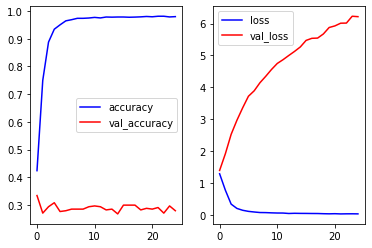

In [8]:
#plot the training results of the  model

fig, (ax1, ax2) = plt.subplots(1,2)

#accuracy plot
ax1.plot( 'epoch', 'accuracy', data=training_log, marker='', color='blue')
ax1.plot( 'epoch', 'val_accuracy', data=training_log, marker='', color='red')
ax1.legend()

#loss plot
ax2.plot( 'epoch', 'loss', data=training_log, marker='', color='blue')
ax2.plot( 'epoch', 'val_loss', data=training_log, marker='', color='red')
ax2.legend()


<p><b>Answer:</b> This graph can be interpretted to see how well the model is trained and performs with train and test data. Looking at the first graph, we can see that the training accuracy has consistently improved as it learned more however, as it reaches epoch 8 it has a slight decrease and from that point the accuracy differs very slightly. On the contrary, looking at the validation accuracy, we can see that it is decreasing and then slightly increasing at epoch 4 then decreasing and increasing throughout the validation. The second graph supports this view because we can see how the training loss also steadily decreases while the validation loss steadily increases. This means  the model gets better at learning the train dataset however when dealing with the test dataset it struggles to generalize to the new data. We can already say that the model has <b>overfitted</b> because of the huge difference between the loss values of training and testing. <b>The model obviously learned the training data so well that when it came to the testing data it was not able to generalize what was learned and therefore performed poorly.</b> </p>

<h3>Exercise 7</h3>
<p>Now, we have the word vectors, but our input data is a sequence of words (or say sentence). How can we utilize these "word" vectors to represent the sentence data and train our model?</p>

<p><b>Answer: </b>In order to represent the document or sentence utilizing the word vectors we can average the word vectors for all the words in each sentence to obtain the sentence vector which will then represent the sentence and can be used to train the model.</p>

<h3>Exercise 8</h3>
<p>Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).</p>
<p> Used code from the lab to complete this exercise </p>

In [ ]:
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE

#load the model
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

#the list of words we will find 15 similar words for
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
#find the similar words and add them to an array
angry_words = [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

#create a concatenated array of all the words found
target_words = angry_words + happy_words + sad_words + fear_words

#choose the colors the different word will be clustered with
cn = topn
color = ['m'] * cn + ['k'] * cn + ['g'] * cn + ['c'] * cn

# prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(w2v_google_model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = w2v_google_model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(20, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

<p>This image will be the output of the code if run above. I had to insert the image because I used Kaggle notebook for this exercise and couldn't run it on my laptop.</p>
<img src="t-SNE.png"/>

<h1>Report</h1>
<h5>Preprocessing steps</h5>
<p>After loading the data into a dataframe, I got rid of all the unnecessary columns like hashtags, and source because 
all that is necessary to predict the emotions from the tweet is the text and emotion categories. 
Next, I removed punctuation from the tweets text and made the text lowercase so when vectorizing 
the text don't, DONT, and don't!, are not considered separate features. </p>
<h5>Feature Engineering</h5>
<p>I used the tf idf vectorizer to split the text into features and assign them importance values.</p>
<h5>Model</h5>
<p>I used the Complement Naive Bayes Model and trained it utilizing 80% of the training data. The training dataset was heavily imbalanced (approximately 50% of the training data was categorized as JOY) </p>

<h5>Attempts and insights</h5>
<p>In terms of feature engineering I used count vectorizer and the nltk word tokenizer which didn't outperform the tf idf vectorizer. Also, I attempted to use SVD to reduce the number of features of the model however I ran out of memory while using kaggle's notebook. In terms of different models I tried, I tried all of the Naive Bayes models and came to the conclusion that the Complement NB model performed better. I tried utilizing the random forest model however the processing took way too long (over 5 hours) and the accuracies I got weren't better than the Naive Bayes models. I also tried to use an SVM model SVC but that also took too long. An insight I've gained doing this assignment is that training a model takes a long time and I need more patience waiting for the results. Also, it needs a lot of memory depending on the model used. </p>

<h5>Code</h5>